In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of nminthreshold to be tested: ", dictionaries.n_min_threshold_values)
n_min_threshold_values=dictionaries.n_min_threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, n_min_threshold_values)

Frame 743: 10 trajectories present.
[10.83172979 14.30253606 13.68754632 12.4555358  13.34937564 33.83869541
 14.85339799 10.56738255 11.41352388 12.35377488  7.8664764   6.54152316
 30.5819406   3.69607912 12.03437262  6.22966192  7.34089836 11.34986636
 13.33908372  8.61370834 19.09281459 21.27523156 11.85948074 21.15304966
  3.31220149  7.99158728  7.59335744 15.56059075 11.77807394 11.74205306
 18.19861184 11.6656759  18.52514377  5.74985463 14.30392711 12.2635407
 14.13745434 11.60192043 10.87534976 11.52700546 12.74934579 10.91776127
 14.43370984 14.66709941 13.58606673 13.60629131  8.10746714 13.7848125
  6.34485357  9.36231135 18.79179785 17.49065351  8.09694576 15.13912693
  5.0458368  11.05704961 20.48412907 15.86068294 12.12543172 21.64473751
  7.90663062 11.91736357 12.84182099 19.32052486 10.15234633 18.00098045
 20.1269184  11.67916663 11.73514593 12.52478227  7.20345267 10.37903968
 15.98589136 16.76522772 14.00068435  8.93515534 12.18476342  9.06703
  5.63730291 23.8692

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,44054,42659.642299,924293.53125,2832.107143,1927,10.594707,60.0,6.0,13.192650,74.691537,1.045054,118
1,11963,129296.193144,924293.53125,21462.107143,535,12.375701,93.0,6.0,12.212276,31.709904,2.052221,987
2,9181,156436.564428,924293.53125,33175.285714,424,12.587264,93.0,6.0,12.551599,33.838695,1.566436,1481
3,8933,162180.794552,924293.53125,37260.000000,402,12.751244,93.0,6.0,12.479962,33.838695,1.566436,1550
4,7661,181792.437866,924293.53125,48055.781250,347,13.112392,93.0,6.0,12.719988,42.932120,2.703896,1975
5,6688,200158.592587,924293.53125,58059.000000,309,13.110032,93.0,6.0,12.853488,33.838695,2.703896,2469


In [11]:
df = pd.read_csv('Save/Jul_1998/n_min_threshold/sensitivity_analysis_nminthreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,44054,42659.642299,924293.53125,2832.107143,1927,10.594707,60.0,6.0,13.192650,74.691537,1.045054,118
1,11963,129296.193144,924293.53125,21462.107143,535,12.375701,93.0,6.0,12.212276,31.709904,2.052221,987
2,9181,156436.564428,924293.53125,33175.285714,424,12.587264,93.0,6.0,12.551599,33.838695,1.566436,1481
3,8933,162180.794552,924293.53125,37260.000000,402,12.751244,93.0,6.0,12.479962,33.838695,1.566436,1550
4,7661,181792.437866,924293.53125,48055.781250,347,13.112392,93.0,6.0,12.719988,42.932120,2.703896,1975
5,6688,200158.592587,924293.53125,58059.000000,309,13.110032,93.0,6.0,12.853488,33.838695,2.703896,2469


In [13]:
# #plot of single Tb sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[225,230,235,240,245]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-1998 - 31-01-1998)')
# ax1.set_xlabel('brightness temperature (K)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-1998 - 31-01-1998)')
# ax2.set_xlabel('brightness temperature (K)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('brightness temperature (K)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('brightness temperature (K)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('brightness temperature (K)')

# plt.savefig('Plot/Jan_1998/singleTb/single_tb_analysis.png')


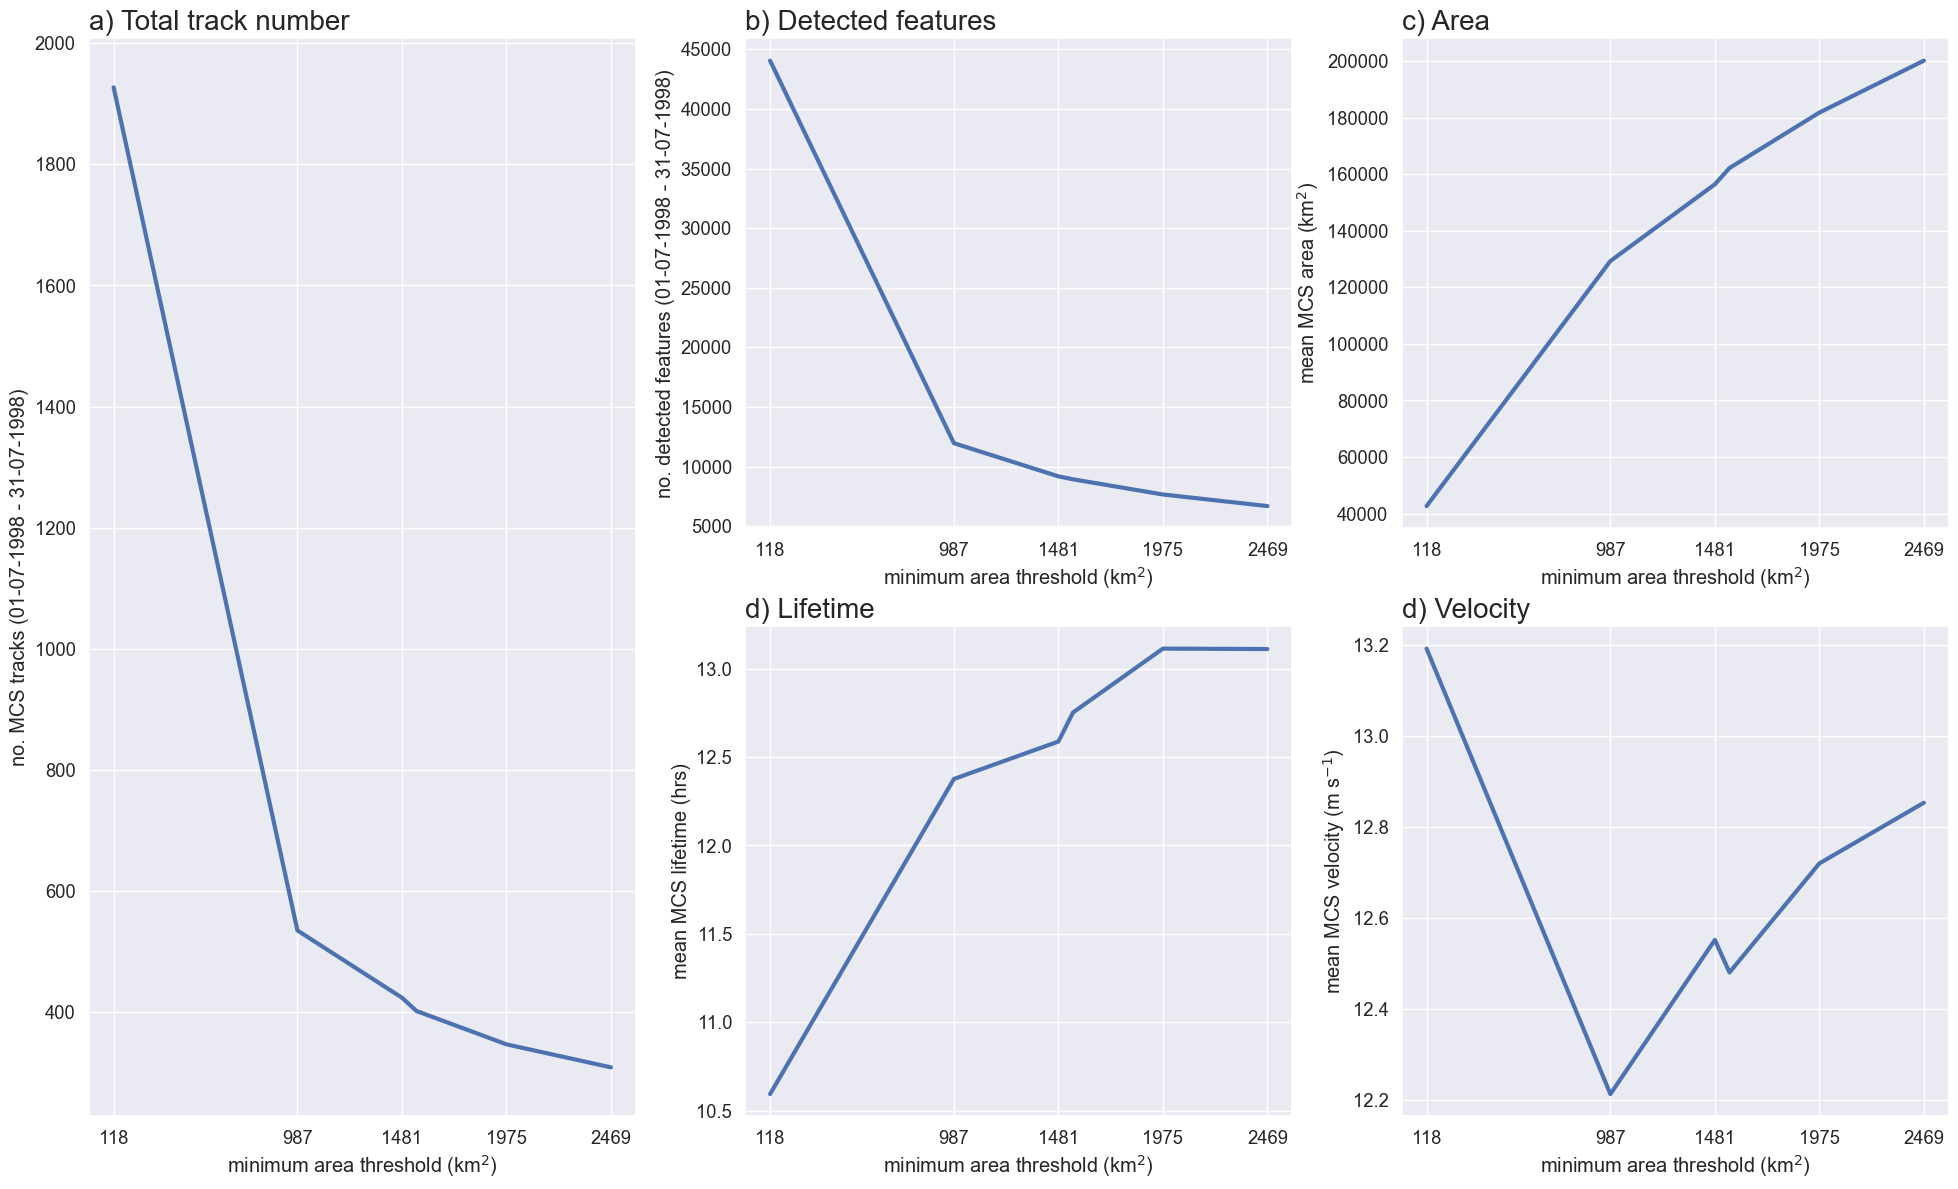

In [14]:
#plot of nminthreshold sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[118,987,1481,1975,2469]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-07-1998 - 31-07-1998)')
ax1.set_xlabel('minimum area threshold (km$^{2}$)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-07-1998 - 31-07-1998)')
ax2.set_xlabel('minimum area threshold (km$^{2}$)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('minimum area threshold (km$^{2}$)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('minimum area threshold (km$^{2}$)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('minimum area threshold (km$^{2}$)')

plt.savefig('Plot/Jul_1998/nminthreshold/nminthreshold_analysis.png')
